In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
ev_data= pd.read_csv("Extended_EVIndia.csv")
ev_data

,Car,Style,Range,Transmission,VehicleType,PriceRange,Capacity,BootSpace,BaseModel,TopModel
0,Tata Nexon EV,Compact SUV,312 Km/Full Charge,Automatic,Electric,₹ 13.99 - 17.4 L,5 Seater,350 L,XM,Dark XZ Plus LUX
1,Tata Tigor EV,Subcompact Sedan,306 Km/Full Charge,Automatic,Electric,₹ 12.49 - 13.64 L,5 Seater,316 L,XE,XZ Plus Dual Tone
2,Tata Nexon EV Max,Compact SUV,437 Km/Full Charge,Automatic,Electric,₹ 17.74 - 19.24 L,5 Seater,350 L,XZ Plus 3.3 kW,XZ Plus Lux 7.2 kW
3,MG ZS EV,Compact SUV,419 Km/Full Charge,Automatic,Electric,₹ 21.99 - 25.88 L,5 Seater,448 L,Excite,Exclusive
4,Hyundai Kona Electric,Compact SUV,452 Km/Full Charge,Automatic,Electric,₹ 23.79 - 23.98 L,5 Seater,na,Premium Dual Tone,HSE
...,...,...,...,...,...,...,...,...,...,...
157,Hyundai Kona Electric,Premium Coupe,415 Km/Full Charge,Automatic,Electric,₹ 21.99 - 25.88 L,4 Seater,405 L,XZ Plus 3.3 kW,Sportback 55
158,Audi E-Tron GT,Subcompact MPV,425 Km/Full Charge,Automatic,Electric,₹ 1.5 Cr,5 Seater,580 L,Excite,Dark XZ Plus LUX
159,Tata Tigor EV,Subcompact MPV,na,Automatic,Electric,₹ 1 Cr,4 Seater,316 L,STD,XZ Plus Lux 7.2 kW
160,Tata Nexon EV,Compact SUV,na,Automatic,Electric,₹ 1.01 - 1.19 Cr,5 Seater,na,XM,Exclusive


In [3]:
ev_data.head()

,Car,Style,Range,Transmission,VehicleType,PriceRange,Capacity,BootSpace,BaseModel,TopModel
0,Tata Nexon EV,Compact SUV,312 Km/Full Charge,Automatic,Electric,₹ 13.99 - 17.4 L,5 Seater,350 L,XM,Dark XZ Plus LUX
1,Tata Tigor EV,Subcompact Sedan,306 Km/Full Charge,Automatic,Electric,₹ 12.49 - 13.64 L,5 Seater,316 L,XE,XZ Plus Dual Tone
2,Tata Nexon EV Max,Compact SUV,437 Km/Full Charge,Automatic,Electric,₹ 17.74 - 19.24 L,5 Seater,350 L,XZ Plus 3.3 kW,XZ Plus Lux 7.2 kW
3,MG ZS EV,Compact SUV,419 Km/Full Charge,Automatic,Electric,₹ 21.99 - 25.88 L,5 Seater,448 L,Excite,Exclusive
4,Hyundai Kona Electric,Compact SUV,452 Km/Full Charge,Automatic,Electric,₹ 23.79 - 23.98 L,5 Seater,na,Premium Dual Tone,HSE


In [4]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Car           162 non-null    object
 1   Style         162 non-null    object
 2   Range         162 non-null    object
 3   Transmission  162 non-null    object
 4   VehicleType   162 non-null    object
 5   PriceRange    162 non-null    object
 6   Capacity      162 non-null    object
 7   BootSpace     162 non-null    object
 8   BaseModel     162 non-null    object
 9   TopModel      162 non-null    object
dtypes: object(10)
memory usage: 12.8+ KB


## Data Preprocessing

In [6]:
# Strip any leading or trailing spaces from column names
ev_data.columns = ev_data.columns.str.strip()


In [7]:
ev_data.fillna(method='ffill', inplace=True)

In [8]:
# Function to convert price strings to numerical values in lakhs
def convert_price_to_lakhs(price_str):
    if 'Cr' in price_str:
        return float(price_str.replace(' Cr', '').replace('₹', '').replace(',', '')) * 100
    elif 'L' in price_str:
        return float(price_str.replace(' L', '').replace('₹', '').replace(',', ''))
    else:
        return float(price_str.replace('₹', '').replace(',', ''))

# Apply the conversion function to the PriceRange column
price_ranges = ev_data['PriceRange'].str.split(' - ')
price_ranges = price_ranges.apply(lambda x: [convert_price_to_lakhs(price) for price in x])
price_range_means = price_ranges.apply(lambda x: sum(x) / len(x))

In [9]:
ev_data['Capacity'] = ev_data['Capacity'].str.replace(' Seater', '').astype(int)
ev_data['BootSpace'] = ev_data['BootSpace'].str.replace(' L', '').replace('na', '0')
ev_data['BootSpace'] = pd.to_numeric(ev_data['BootSpace'], errors='coerce').fillna(0).astype(int)

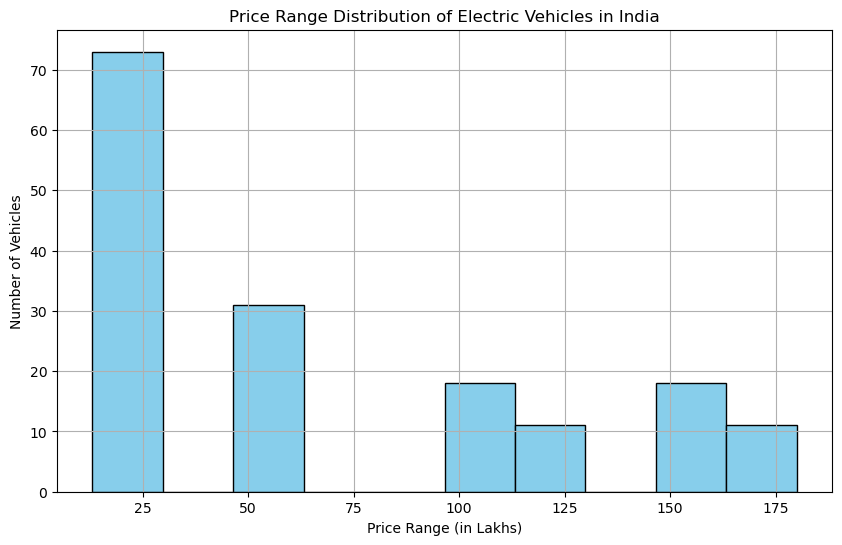

In [10]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Histogram of price ranges
plt.hist(price_range_means, bins=10, color='skyblue', edgecolor='black')
plt.title('Price Range Distribution of Electric Vehicles in India')
plt.xlabel('Price Range (in Lakhs)')
plt.ylabel('Number of Vehicles')
plt.grid(True)
plt.show()

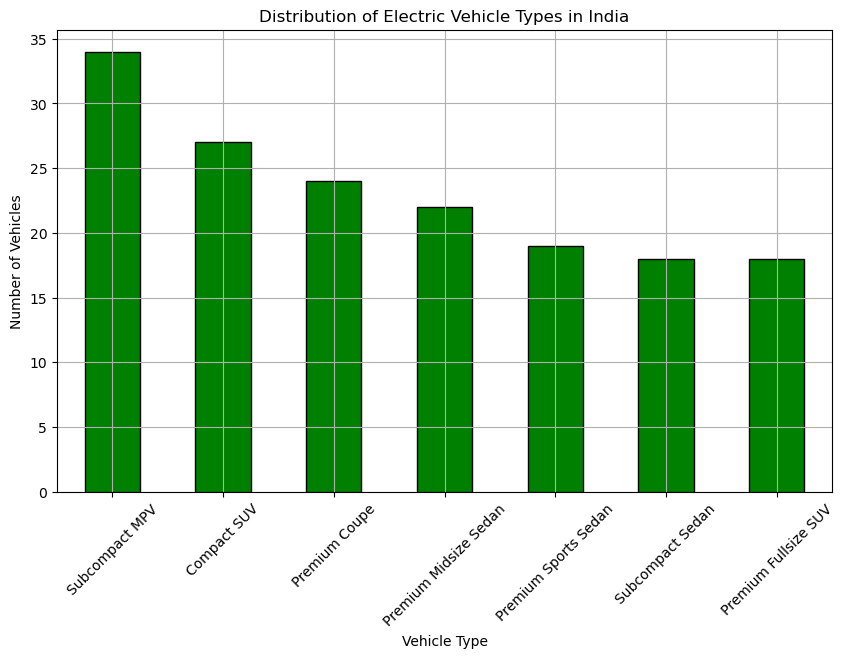

In [11]:
vehicle_types = ev_data['Style'].value_counts()

plt.figure(figsize=(10, 6))
vehicle_types.plot(kind='bar', color='green', edgecolor='black')
plt.title('Distribution of Electric Vehicle Types in India')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

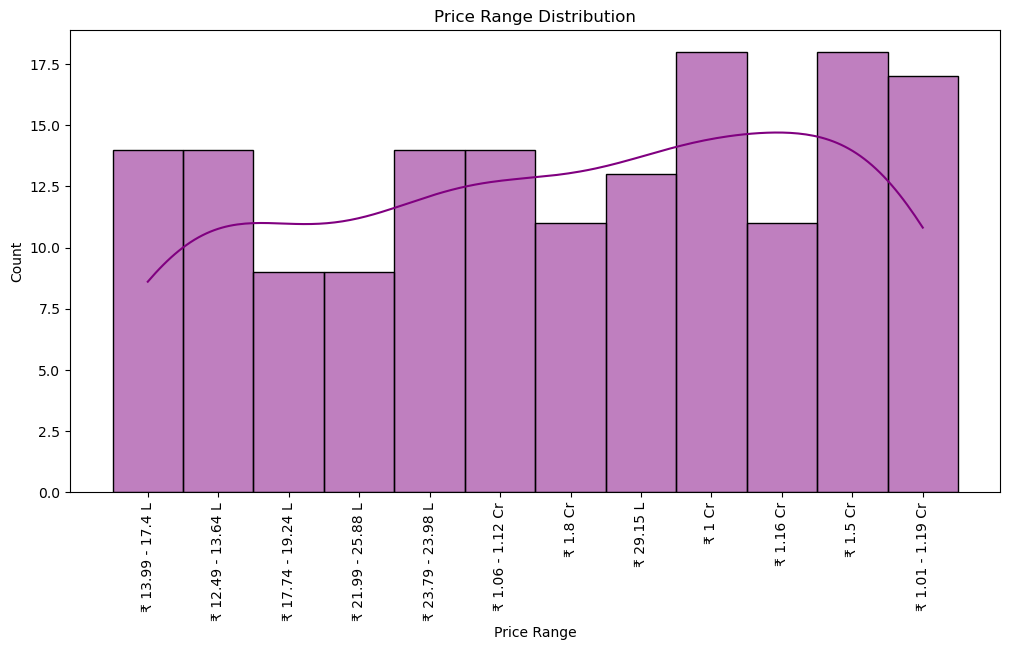

In [14]:
# Distribution of price ranges
plt.figure(figsize=(12, 6))
sns.histplot(data=ev_data, x='PriceRange', bins=15, kde=True, color='purple')
plt.xticks(rotation=90)
plt.title('Price Range Distribution')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()

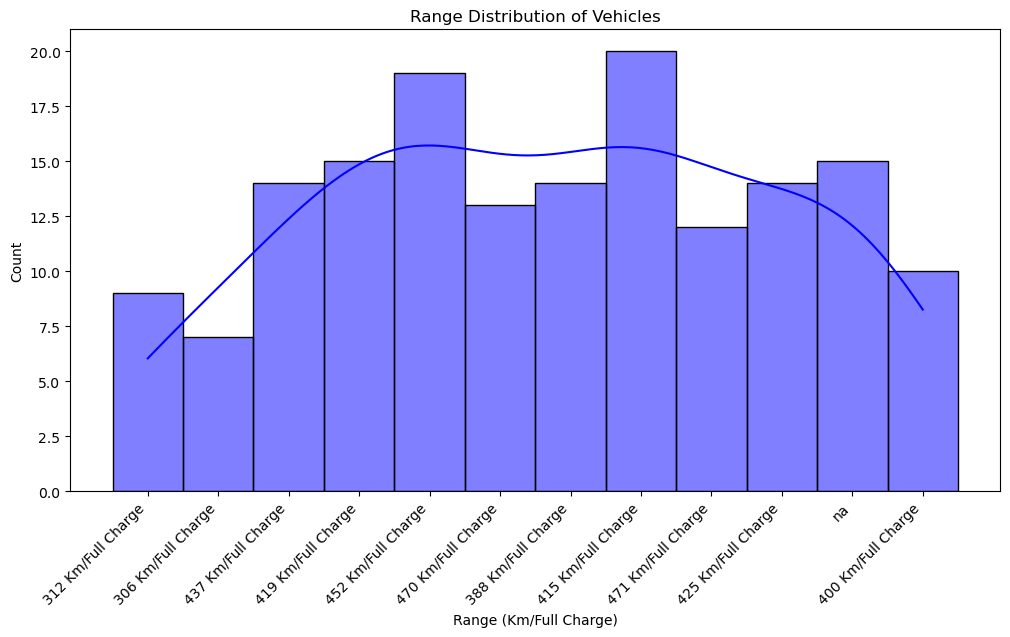

In [15]:
# Distribution of vehicle ranges
plt.figure(figsize=(12, 6))
sns.histplot(data=ev_data, x='Range', bins=10, kde=True, color='blue')
plt.title('Range Distribution of Vehicles')
plt.xlabel('Range (Km/Full Charge)')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


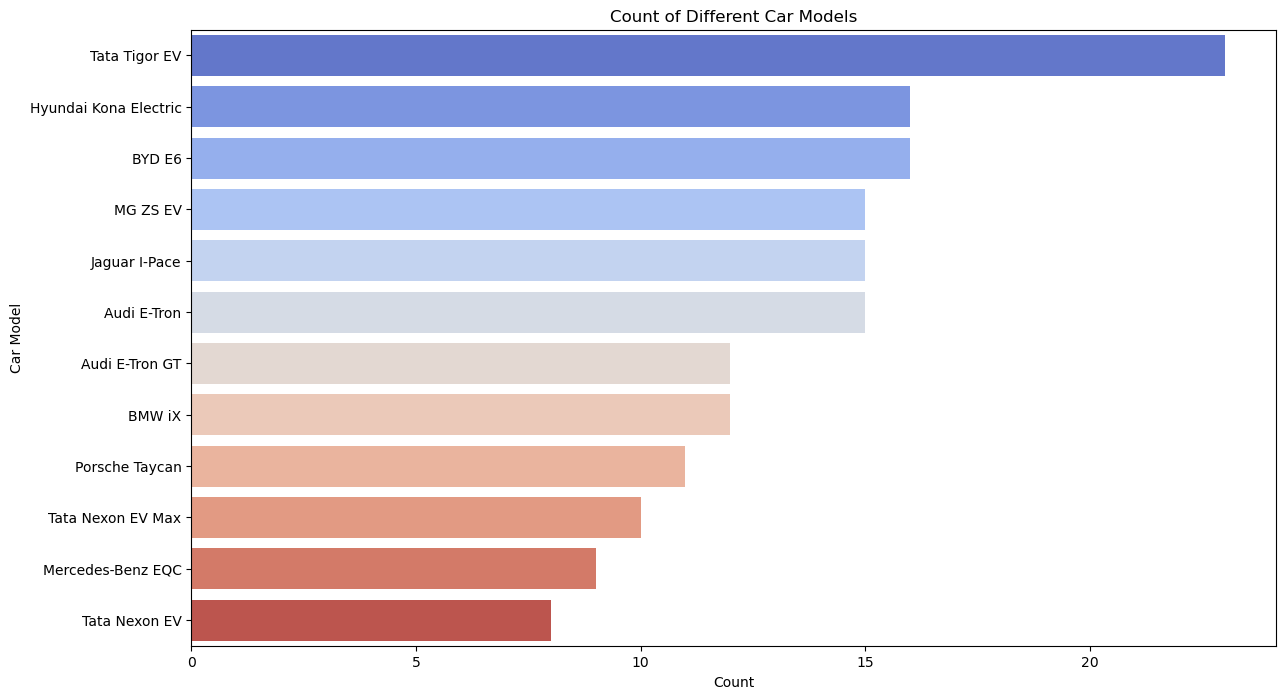

In [16]:
# Count of different car models
plt.figure(figsize=(14, 8))
sns.countplot(data=ev_data, y='Car', order=ev_data['Car'].value_counts().index, palette='coolwarm')
plt.title('Count of Different Car Models')
plt.xlabel('Count')
plt.ylabel('Car Model')
plt.show()